In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [2]:
res_list = []

for i in range(60):
    res_list.append(qload('itj_{}'.format(i+1)))
    
res_list[0].states[-1]

Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[0.06060676-0.0790392j ]
 [0.16301556-0.23153659j]
 [0.15052773-0.23648093j]
 [0.12927575-0.21200697j]
 [0.17645766-0.23340187j]
 [0.05904474-0.07629311j]
 [0.14839082-0.23295352j]
 [0.12444357-0.21186655j]
 [0.17358232-0.2303743j ]
 [0.16866016-0.22943208j]
 [0.0505173 -0.0783907j ]
 [0.12632158-0.21415116j]
 [0.17363077-0.23486393j]
 [0.16509912-0.22666139j]
 [0.14537204-0.23514305j]
 [0.12453643-0.2177017j ]]

In [3]:
res00_list = []
res01_list = []
res10_list = []
res11_list = []

for i in range(60):
    if i % 2 == 1:
        res00_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,0),basis(2,0))))
        res01_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,0),basis(2,1))))
        res10_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,1),basis(2,0))))
        res11_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,1),basis(2,1))))

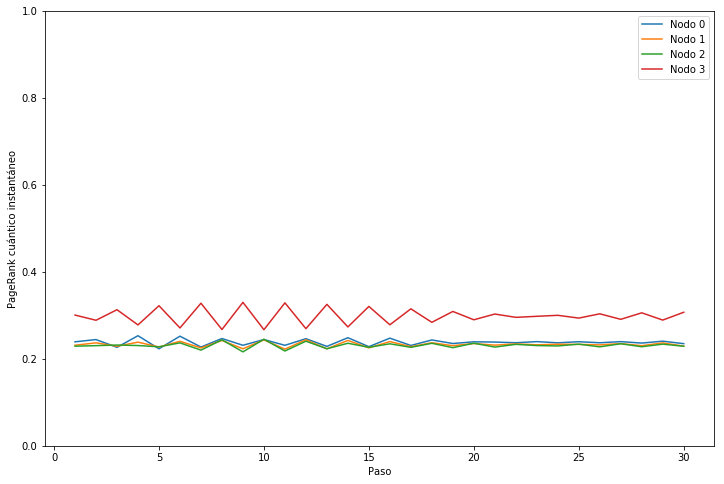

In [5]:
'''
res00_list = [0.232292, 0.237052, 0.227558, 0.241464, 0.223241, 0.245193, \
0.219711, 0.247969, 0.217278, 0.249599, 0.21616, 0.249971, 0.216461, \
0.249061, 0.218153, 0.24693, 0.221081, 0.243724, 0.224985, 0.239671, \
0.229524, 0.235068, 0.234317, 0.230271, 0.238974, 0.225666, 0.243136, \
0.221638, 0.246492, 0.218537]

res01_list = [0.232292, 0.237052, 0.227558, 0.241464, 0.223241, 0.245193, \
0.219711, 0.247969, 0.217278, 0.249599, 0.21616, 0.249971, 0.216461, \
0.249061, 0.218153, 0.24693, 0.221081, 0.243724, 0.224985, 0.239671, \
0.229524, 0.235068, 0.234317, 0.230271, 0.238974, 0.225666, 0.243136, \
0.221638, 0.246492, 0.218537]

res10_list = [0.232292, 0.237052, 0.227558, 0.241464, 0.223241, 0.245193, \
0.219711, 0.247969, 0.217278, 0.249599, 0.21616, 0.249971, 0.216461, \
0.249061, 0.218153, 0.24693, 0.221081, 0.243724, 0.224985, 0.239671, \
0.229524, 0.235068, 0.234317, 0.230271, 0.238974, 0.225666, 0.243136, \
0.221638, 0.246492, 0.218537]

res11_list = [0.303125, 0.288843, 0.317326, 0.275608, 0.330276, 0.264421, \
0.340867, 0.256092, 0.348167, 0.251203, 0.351519, 0.250086, 0.350616, \
0.252816, 0.345542, 0.25921, 0.336758, 0.268827, 0.325046, 0.280988, \
0.311428, 0.294795, 0.29705, 0.309186, 0.283077, 0.323001, 0.270593, \
0.335085, 0.260524, 0.344389]
'''


fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,8))
axes.plot(list(range(1,31)),np.abs(res00_list), label='Nodo 0')
axes.plot(list(range(1,31)),np.abs(res01_list), label='Nodo 1')
axes.plot(list(range(1,31)),np.abs(res10_list), label='Nodo 2')
axes.plot(list(range(1,31)),np.abs(res11_list), label='Nodo 3')
axes.set_xlabel('Paso')
axes.set_ylabel('PageRank cuántico instantáneo')
axes.set_ylim(0,1)
axes.legend()
fig.savefig('../../../img/crown-inst-lossless.eps', format='eps')

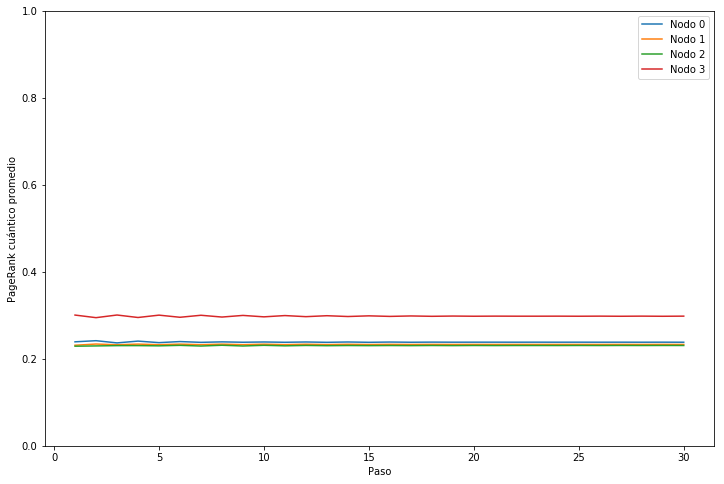

In [6]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,8))
axes.plot(list(range(1,31)),np.abs([np.mean(res00_list[:i+1]) for i in range(len(res00_list))]), label='Nodo 0')
axes.plot(list(range(1,31)),np.abs([np.mean(res01_list[:i+1]) for i in range(len(res01_list))]), label='Nodo 1')
axes.plot(list(range(1,31)),np.abs([np.mean(res10_list[:i+1]) for i in range(len(res10_list))]), label='Nodo 2')
axes.plot(list(range(1,31)),np.abs([np.mean(res11_list[:i+1]) for i in range(len(res11_list))]), label='Nodo 3')
axes.set_xlabel('Paso')
axes.set_ylabel('PageRank cuántico promedio')
axes.set_ylim(0,1)
axes.legend()
fig.savefig('../../../img/crown-mean-lossless.eps', format='eps')

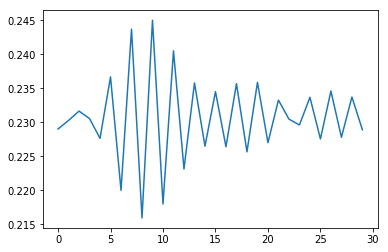

In [6]:
plt.plot(np.abs(res10_list))

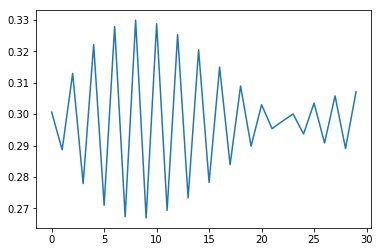

In [7]:
plt.plot(np.abs(res11_list))

In [8]:
[np.mean(res00_list),np.mean(res01_list),np.mean(res10_list),np.mean(res11_list)]

[0.23817210461341273,
 0.2330230522565127,
 0.2306529811600285,
 0.2981518619700461]

In [9]:
np.mean(res00_list)+np.mean(res01_list)+np.mean(res10_list)+np.mean(res11_list)

1.0